In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Constants
M = 250         # Grid squares on a side
V = 0.0         # Voltage at top wall
L = 1.0         # Side length of box
target = 3e-4   # Target accuracy
epsilon_0 = 8.85e-12
a = L / float(M) # grid point spacing

In [26]:
# Create arrays to hold potential values
phi = np.zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = np.empty([M+1,M+1],float)

In [27]:
# Create surface charge density array
rho_values = [-1.0, 1.0]  # Surface charge density
charge_width = [0.2, 0.2] # Width of the charges (assuming squares)
charge_boundaries = [[0.2, 0.2], [0.6, 0.6]] # Position of origin of the charges
rho = np.zeros([M+1,M+1], float)
for i in range(len(rho_values)):
    i0 = int(charge_boundaries[i][0] / a)
    i1 = int(charge_boundaries[i][1] / a)
    w = int(charge_width[i] / a)
    rho[i0:i0+w+1, i1:i1+w+1] = rho_values[i]
    print(i0,i0+w+1,i1,i1+w+1)

50 101 50 101
150 201 150 201


In [28]:
# Main loop
delta = 1.0
iteration = 0
while delta>target:

    # Calculate new values of the potential
    phiprime[0,:] = phi[0,:]
    phiprime[-1,:] = phi[-1,:]
    phiprime[:,0] = phi[:,0]
    phiprime[:,-1] = phi[:,-1]
    phiprime[1:M,1:M] = 0.25 * (phi[2:,1:M] + phi[:M-1,1:M] + phi[1:M,2:] + phi[1:M,:M-1]) + \
        (0.25 * a**2 / epsilon_0) * rho[1:M,1:M]
    
    # Calculate new values of the potential
    #for i in range(M+1):
    #    for j in range(M+1):
    #        if i==0 or i==M or j==0 or j==M:
    #            phiprime[i,j] = phi[i,j]
    #        else:
    #            phiprime[i,j] = 0.25*(phi[i+1,j] + phi[i-1,j] \
    #                                  + phi[i,j+1] + phi[i,j-1]) + \
    #                                  (0.25 * a**2 / epsilon_0) * rho[i,j]
                                      

    # Calculate maximum fractional difference from old values
    delta = np.abs(phi-phiprime)
    nonzero = phi > 0
    if nonzero.any():
        #delta = np.max(delta[nonzero] / phi[nonzero])
        delta = np.max(delta[nonzero])
    else:
        delta = 1.0
    if iteration % 10 == 0:
        print("Iteration %3d: max. residual = %12.6g" % (iteration, delta))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi
    iteration += 1

Iteration   0: max. residual =            1
Iteration  10: max. residual =       451977
Iteration  20: max. residual =       451977
Iteration  30: max. residual =       451977
Iteration  40: max. residual =       451977
Iteration  50: max. residual =       451977
Iteration  60: max. residual =       451975
Iteration  70: max. residual =       451966
Iteration  80: max. residual =       451934
Iteration  90: max. residual =       451860
Iteration 100: max. residual =       451716
Iteration 110: max. residual =       451476
Iteration 120: max. residual =       451114
Iteration 130: max. residual =       450610
Iteration 140: max. residual =       449948
Iteration 150: max. residual =       449117
Iteration 160: max. residual =       448111
Iteration 170: max. residual =       446930
Iteration 180: max. residual =       445575
Iteration 190: max. residual =       444053
Iteration 200: max. residual =       442371
Iteration 210: max. residual =       440537
Iteration 220: max. residual =  

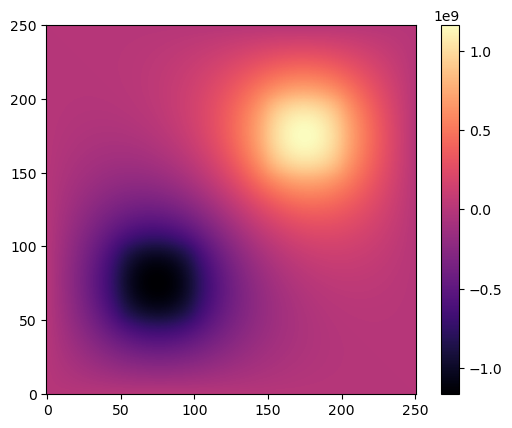

In [30]:
# Make a plot
plt.imshow(phi, origin='lower', cmap='magma')
#plt.gray()
plt.colorbar()
plt.show()